# Operators on a Qumode
B. McDonough\
J. Cui\
G. Marous

### Contents
1. Ladder operators - the fundamental operators on a Qumode
    1. The number operator - how the number operators arise from the commutation relations between the ladder operators
2. Fock states - states with a definite number of quanta formally defined wrt. the number operator
3. Quadrature operators
    1. Connection to harmonic oscillators
4. "Dictionary" for describing operators with continuous spectra

## Basic operators

A bit-flip is the obvious operation on a classical bit which is either in the state $0$ or $1$. In addition to the bit-value, qubit states also exhibit a phase in the form of a complex scalar multiplying each basis ket. Accordingly, both a bit-flip and a phase-flip can be performed on a qubit. A bit-flip operation on a qubit is described by a $\sigma^x$ operator. Phase-flips are performed with $\sigma^z$. A rotation of the qubit by any degree $\theta$ about any axis $\hat n$ can be described using these operations alone. Defining the pseudovector $\vec \sigma \equiv (\hat \sigma^x, i\hat \sigma^x\hat \sigma^z, \hat \sigma^z)$, the operator performing this rotation is
$$
\text{Rotation about $\hat n$ by $\theta$ degrees} = e^{-i\frac{\theta}{2}\hat n \cdot \vec \sigma}
$$

**Note:** To raise $e$ to a matrix exponent, use the power series representation $e^M = \sum_{n=0}^\infty \frac{M^n}{n!}$

If bit-flips and phase-flips are the basic operations describing the control of a qubit, what are the corresponding operations on a qumode? Oftentimes the states of a qumode marching up to infinity are compared to a ladder, where adding a quantum to the qumode climbs one rung up the ladder, and removing a quantum climbs one rung down the ladder. This motivates us to introduce the so-called *ladder operators* $a$ and $a^\dagger$. The operator $a$ is called the annihilation operator because it removes a quantum from the qumode, and the operator $a^\dagger$ is the creation operator because it adds a quantum to the qumode. 

![ladder cat](https://github.com/benmcdonough20/bosonic-qiskit-tutorials/raw/main/bosonic_qiskit_textbook/figures/ladder_cat.png)

Figure reproduced from Giffiths' **Introduction to Quantum Mechanics**. The cat has no physical significance.

**Note:** The ${}^\dagger$ operation is called the adjoint. In a finite-dimensional qubit basis, the adjoint of an operator is represented by the conjugate transpose of the operator matrix. In the infinite-dimensional basis of a qumode, the adjoint is defined more generally: If $O$ is an operator, $|u\rangle$ and $|v\rangle$ are kets, and $\Big\langle |u\rangle, |v\rangle \Big\rangle = \langle v | u\rangle$ is the inner product of $|u\rangle$ and $|v\rangle$, then $O^\dagger$ is the adjoint of $O$ iff $\Big\langle O^\dagger|u\rangle, |v\rangle \Big\rangle = \Big\langle |u\rangle, O|v\rangle \Big\rangle$. Shortly, we will see why the creation operator is defined as the adjoint of the annihilation operator.

## Ladder operators

There are two types of particles in the universe: bosons and fermions. Bosons are defined by the property that if $a,a^\dagger$ are annihilation and creation operators for a boson, then $[a,a^\dagger] = 1$. The bracket symbol $[\cdot, \cdot]$ is called the commutator, and it is defined as
$$
[A,B] = AB-BA
$$
The commutator measures the degree to which two operators fail to commute, and the commutator $[a,a^\dagger] = 1$ has important consequences. It is important to note that the ladder operators cannot be applied directly to a quantum state in bosonic qiskit because they are *nonunitary*, and thus they cannot describe the noiseless evolution of a qumode.

**Excercise**:
Prove the identity $[AB, C] = [A,C]B + A[B,C]$. Assuming that $[A,[A,B]] = [B,[A,B]] = 0$, show that $[A^n, B] = nA^{n-1}[A,B]$. Lastly, under the same assumption, prove that $[e^{A}, B] = e^{A}[A,B]$.


### The number operator
The first thing we can do with the ladder operators is to construct a new operator called the *number operator*:
$$
\hat n \equiv a^\dagger a
$$
Why is it called the number operator? Using the commutator $[a, a^\dagger] = 1$, we can work out the commutator of $\hat n$ with $a$:
\begin{align*}
[\hat n, a] &= [a,a]a^\dagger + a[a^\dagger,a] = -a
\end{align*}
Then, we consider a ket $|n\rangle$ that is an eigenket of $\hat n$ with eigenvalue $n$. We see that
\begin{align*}
\hat n(a|n\rangle) &= (a\hat n+[N,a])|n \rangle = (n-1)(a|n\rangle)
\end{align*}
This shows us that applying $a$ to $|n\rangle$ results in an eigenket of $N$ with eigenvalue $n-1$, and so 
$$
a|n\rangle = c_n|n-1\rangle
$$
where $c_n$ is a constant. But $a$ is *defined* to be an operator such that applying it to a state of the qumode removes one quantum from the qumode. This means that the state $|n-1\rangle$ represents a state with one less quantum than $|n\rangle$. We can make the same argument to prove the reverse for $a^\dagger$. Moreover, $\Vert a |n\rangle \Vert^2 = |c_n|^2 \geq 0$, and $\Vert a|n\rangle \Vert^2 = \langle n|a^\dagger a | n \rangle=n$, and so $n \geq 0$. These facts together show us that $n$ is the number of quanta in the qumode, and $\hat n$ is a special operator that counts the number of quanta. For this reason, it is called the *number operator*.


### Wigner Function of a Fock state
As mentioned in `Introduction.ipynb`, the kets $|n\rangle$ with a definite number of quanta $n$ are called *Fock states*. Now, Fock states can be defined as eigenstates of the number operator. One of the best tools for visualizing quantum states is the *Wigner quasiprobability distribution*, or *Wigner function*. This is explored in `wigner_distribution.ipynb`. Below, bosonic qiskit is used to initialize the $|4\rangle$ state and plot its Wigner function. The number of rings surrounding the center corresponds to the number of quanta in the qumode.

In [1]:
import c2qa
import numpy as np
import qiskit
import qiskit.visualization

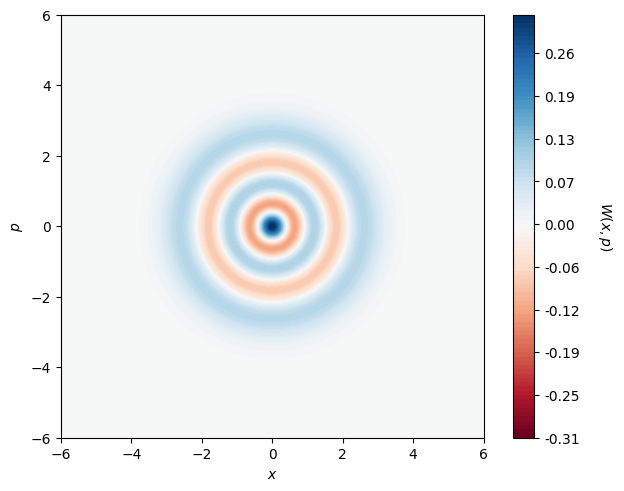

In [2]:
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode=3) #create a qumoderegister with one qumode
circuit = c2qa.CVCircuit(qmr) #create a CV circuit

circuit.cv_initialize(4, qmr) #initialize the qumode in the state |4>

#simulate and plot the wigner function (more about this in wigner_distribution.ipynb!)
state,_ = c2qa.wigner.simulate(circuit)
plot = c2qa.wigner.plot_wigner(circuit, state) #5 rings correspond to 4 quanta
#try out different numbers and plot the wigner functions!

### Properties
We can explore more properties of the ladder operators using these facts. First, we find
$$
\Vert a|n\rangle \Vert^2 = \langle n| a^\dagger a |n\rangle = n\langle n | n\rangle = n
$$
But $\Vert a|n\rangle \Vert^2 = |c_n|^2$, and so $|c_n|^2 = n$. We can choose $c_n$ to be real without loss of generality, and so $c_n = \sqrt{n}$. This gives
$$
a|n\rangle = \sqrt{n}|n-1\rangle
$$
We can find the constant $d_n$ such that $a^\dagger |n\rangle = d_n |n+1\rangle$ by enforcing that $a^\dagger$ is the adjoint of $a$. This requires that
$$
\Big \langle a|n\rangle, |m\rangle \Big \rangle = 
\Big \langle |n\rangle, a^\dagger|m\rangle \Big \rangle
$$
The inner product is antilinear in the first argument (required for positivity), meaning that $\langle u, av\rangle = \langle a^\ast u, v \rangle$. Thus we have
$$
\Big \langle a|m\rangle, |n\rangle \Big \rangle = \sqrt{m}\langle m-1| n \rangle = \sqrt{n+1}\delta_{m-1, n}
$$
and
$$
\Big \langle |m\rangle, a^\dagger|n\rangle \Big \rangle = d_n \langle m | n+1\rangle = d_n\delta_{m, n+1}
$$
Setting these equal, we get $d_n = \sqrt{n+1}$, and so
$$
a^\dagger |n\rangle = \sqrt{n+1}|n+1\rangle
$$



### Measuring the number of quanta
Bosonic qiskit provides a function to map the number of quanta in the cavity onto the computational basis through `cv_measure`.

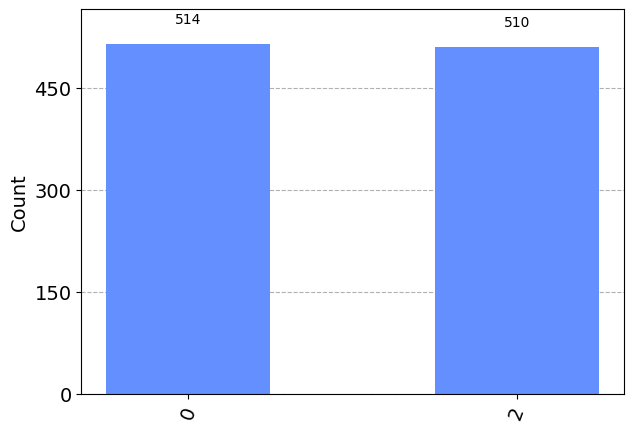

In [3]:
#Intialize a qumode register. To map the number of quanta onto qubit states, the number of
#classical bits needs to equal the number of qubits representing the qumode.
num_qubits = 4
qureg = c2qa.QumodeRegister(1, num_qubits_per_qumode=num_qubits)
creg = qiskit.ClassicalRegister(num_qubits)

#Initialize circuit as a cuperposition of |0> and |2>
circuit = c2qa.CVCircuit(qureg, creg, probe_measure=True)
circuit.cv_initialize(1/np.sqrt(2)*np.array([1,0,1]), qureg[0])

#Use the cv_measure method to map the Fock number onto creg!
circuit.cv_measure([qureg[0]], creg)

#Simulation can use the Aer simulator or the build-in simulate method
_, result = c2qa.util.simulate(circuit)

#Convert the counts dictionary from binary to base-10 and plot histogram
fock_counts = c2qa.util.cv_fockcounts(result.get_counts(), [qureg[0]])
qiskit.visualization.plot_histogram(fock_counts)

## Operators as outer products
So far, Dirac notation has simplified writing down states such as $|\psi\rangle$, $|\phi\rangle$, and inner products $\langle \psi | \phi \rangle$. Dirac notation can also be useful to simplify the way operators are written. A linear operator $T$ can be uniquely defined by the way it acts on a basis. Consider the number basis $B = \{|0\rangle, |1\rangle, |2\rangle, ...\}$. When $T$ acts on $|n\rangle$, the resultant state will be a new vector, which we will label $T|n\rangle \equiv |t_n\rangle$. Then we claim that we can write $T$ as
$$
T = \sum_{m=0}|t_m\rangle \langle m|
$$
This follows from the orthonormality of $B$: $\langle n | m \rangle = \delta_{mn}$. We can use the associativity of the algebra to check that $T$ produces the correct output for each basis ket input:
$$
T |n\rangle = \sum_{m=0}|t_m\rangle \langle m|n\rangle = 
\sum_{m=0}|t_m\rangle\delta_{mn} = 
|t_n\rangle
$$

### Examples
Some interesting examples of this are

1. 
$$
\hat n = \sum_{n=0}^\infty n|n\rangle \langle n|
$$
2. 
$$
a = \sum_{n=0}^\infty \sqrt{n}|n-1\rangle \langle n|
$$
3.
$$
a^\dagger = \left(\sum_{n=0}^\infty \sqrt{n}|n-1\rangle \langle n|\right)^\dagger = 
\sum_{n=0}^\infty \sqrt{n}(|n-1\rangle \langle n|)^\dagger = 
\sum_{n=0}^\infty \sqrt{n+1}|n+1\rangle \langle n|
$$
We can also conveniently Taylor-expand any smooth function of the operator $\hat n$:

4.
$$
f({\alpha \hat n})|n\rangle = \sum_{m=0}^\infty \frac{f^{m}(0)(\alpha \hat n)^m|n\rangle}{m!} = 
\sum_{m=0}^\infty \frac{(\alpha n)^m|n\rangle}{m!} = f(\alpha n)|n\rangle
$$
Using the method above of writing linear maps using outer products, we can then say that
$$
f(\alpha \hat n) = \sum_{n=0}^\infty f(\alpha n)|n\rangle \langle n|
$$
This is immediately applicable to any bounded, Hermitian operator in its eigenbasis.

**Excercise:** Prove that $\sum_{n=0}^\infty |n\rangle\langle n| = \mathbb{I}$, where $\mathbb{I}$ is the identity operator with support on qumode state space.

## Qumodes as harmonic oscillators
Qumodes are often referred to as quantum harmonic oscillators, and so far we have completely avoided addressing why a qumode, which is a system to which quanta can be added or removed, would have anything to do with a harmonic oscillator. This connection begins by introducing the quadrature operators $\hat X$ and $\hat P$, which are defined in terms of the creation and annihilation operators as
\begin{align*}
\hat X &= \frac{a + a^\dagger}{\sqrt{2}} & \hat P &= \frac{a-a^\dagger}{i\sqrt{2}}
\end{align*}
Using $[a,a^\dagger]=1$, we quickly work out $[\hat X, \hat P] = i$. As we have said previously, the qumode has a fundamental frequency $\omega$, and each quantum in the mode contributes energy $\hbar \omega$. Bosonic Qiskit conventionally chooses units in which $\hbar = 1$, which we will adopt going forward. Therefore, we can introduce the energy operator, or Hamiltonian,
$$
\hat H = \omega \hat n
$$
Since only energy differences are directly measurable, we are free to set the energy of the $|0\rangle$ state, the zero-point energy, to be whatever we like. Choosing $\frac{\omega}{2}$ for this energy, we have the adjusted Hamiltonian
$$
\hat H' = \omega\left(\hat n+\frac{1}{2}\right) = \omega\left(a^\dagger a + \frac{1}{2}\right)
$$
In terms of the new $\hat X$ and $\hat P$ operators, this is written
\begin{align*}
\hat H' &= \omega\left(\left[\frac{\hat X-i\hat P}{\sqrt{2}}\right]\left[\frac{\hat X+i\hat P}{\sqrt{2}}\right]+\frac{1}{2}\right)\\
&= \omega\left(\frac{\hat X^2}{2}+\frac{\hat P^2}{2}+\frac{i}{2}[\hat X,\hat P]+\frac{1}{2}\right)\\
&= \frac{\omega \hat X^2}{2}+\frac{\omega \hat P^2}{2}
\end{align*}
Then, we define a rescaled set of operators
\begin{align*}
\hat x &\equiv \hat X(m\omega)^{-\frac{1}{2}} & 
\hat p &\equiv \hat P( m\omega)^\frac{1}{2} & 
\end{align*}
In terms of these operators, the Hamiltonian is written
$$
\hat H' = \frac{\hat p^2}{2m} + \frac{1}{2}m\omega^2 x^2
$$
This can be recognized as the energy of any classical harmonic oscillator, such as a spring attached to a mass $m$ and a spring constant $k = m\omega^2$, as shown in the picture below.

![A classical harmonic oscillator](./figures/oscillator.svg )

In the case of a cavity mode, the electric field plays the role of position, and the magnetic field plays the role of momentum. This is a beautiful connection that goes much deeper than a seemingly random redefinition of operators. For more on this, see the tutorial on coherent states, `coherent_states.ipynb`

### Continuous bases
We have seen that $\hat n$ is a Hermitian operator, with $\hat n^\dagger = (a^\dagger a)^\dagger = a^\dagger a = \hat n$. This implies that it has a complete, orthogonal set of eigenkets, which we have identified with the Fock states $\{|0\rangle, |1\rangle, |2\rangle,...\}$. We can also quickly check that $\hat x^\dagger = \hat x$ and $\hat p^\dagger = \hat p$, so these operators are also Hermitian. But after exploring the correspondence between $\hat x$, $\hat p$ and classical position and momentum, $\hat x$ should have eigenvalues corresponding to *every real number*. Thus, instead of a countably infinite basis, $\{|n\rangle | n \in \mathbb{N}\}$, we now have the *uncountably infinite* basis $\{|x'\rangle | x' \in \mathbb{R}\}$. 

**Note:** In case you are worried that there is a contradiction in transforming between a countably and uncountably infinite eigenbasis, this is only possible due to a property of the Hilbert space called *separability*.


This may seem complicated, but we can easily update all of the formalism by essentially replacing every Krockecker delta with a Dirac delta, and every sum with an integral. This can be summarized by the following "dictionary" of translations, where $\hat A$ is a Hermitian operator with discrete eigenvalues $a'$, and $\hat \xi$ is an operator with continuous eigenvalues $\xi'$:

\begin{align*}
\sum_{a'} &\to \int d\xi'\\
\text{(Orthonormality:)} \ \langle a'|a'' \rangle = \delta_{a'a''} &\to \langle \xi' | \xi' \rangle = \delta(\xi-\xi')\\
\text{(Completeness:)} \  \sum_{a'}|a'\rangle \langle a'| = \mathbb{I} &\to \int d\xi' |\xi'\rangle\langle \xi'| = \mathbb{I}\\
\text{(Normalization:)} \ \sum_{a'}|\langle a'|\alpha\rangle |^2 = 1 &\to \int d\xi' |\langle \xi'|\alpha\rangle|^2 = 1
\end{align*}

In addition, when we talk about the wavefunction of a state $|\alpha\rangle$ in the basis $\{|\xi\rangle\}$, we are referring to the inner product
$$
\psi_\alpha(\xi') \equiv \langle \xi' | \alpha \rangle
$$
where $\psi$ is interpreted as a continuous function of the eigenvalue $\xi'$ of the $\xi$ operator.

## Citations
[1] Griffiths, David J., and Darrell F. Schroeter. Introduction to quantum mechanics. Cambridge university press, 2018.

[2] Gerry, Christopher, Peter Knight, and Peter L. Knight. Introductory quantum optics. Cambridge university press, 2005.

[3] Sakurai, J., and J. Napolitano. "Modern quantum mechanics. 2-nd edition." Person New International edition (2014): 35.